In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../..")

In [3]:
import numpy as np

In [4]:
from librep.datasets.har.loaders import MotionSense_BalancedView20HZ

2022-11-01 00:27:10.397625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-01 00:27:10.397645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
# MotionSense Loader
loader = MotionSense_BalancedView20HZ(
    root_dir="../../../data/views/MotionSense/balanced_view_20Hz_with_gravity_9.81_acc_standard", 
    download=False
)

# Print the readme (optional)
loader.print_readme()

# Balanced MotionSense View Resampled to 20Hz with Gravity - Multiplied acc by 9.81m/s²

This is a view from [MotionSense] that was spllited into 3s windows and was resampled to 20Hz using the [FFT method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html#scipy.signal.resample). 

The data was first splitted in three sets: train, validation and test. Each one with the following proportions:
- Train: 70% of samples
- Validation: 10% of samples
- Test: 20% of samples

After splits, the datasets were balanced in relation to the activity code column, that is, each subset have the same number of activitiy samples.

**NOTE**: Each subset contain samples from distinct users, that is, samples of one user belongs exclusivelly to one of three subsets.

## Activity codes
- 0: downstairs (569 train, 101 validation, 170 test) 
- 1: upstairs (569 train, 101 validation, 170 test) 
- 2: sitting (569 train, 101 validation, 170 test) 
- 3: standing (569 train, 101 validation, 170 test) 
- 4: walking (569 train, 101 validation, 170 test) 
- 5: jogging (569 train, 101 validation, 170 test) 
 

## Standartized activity codes
- 0: sit (569 train, 101 validation, 170 test) 
- 1: stand (569 train, 101 validation, 170 test) 
- 2: walk (569 train, 101 validation, 170 test) 
- 3: stair up (569 train, 101 validation, 170 test) 
- 4: stair down (569 train, 101 validation, 170 test) 
- 5: run (569 train, 101 validation, 170 test) 
      




In [6]:
# Load the dataset
# If concat_train_validation is true, return a tuple (train+validation, test)
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val, test

(PandasMultiModalDataset: samples=4020, features=360, no. window=6, label_columns='standard activity code',
 PandasMultiModalDataset: samples=1020, features=360, no. window=6, label_columns='standard activity code')

In [7]:
train_HD = np.array(train_val[:][0])
train_Y = np.array(train_val[:][1])
test_HD = np.array(test[:][0])
test_Y = np.array(test[:][1])

In [8]:
print(len(train_HD), len(train_Y), len(test_HD), len(test_Y))

4020 4020 1020 1020


In [9]:
from librep.transforms.topo_ae import TopologicalDimensionalityReduction
from Experiments_topoae_KuHar20Hz_helper import *
dimension_to_test = 5

kwargs = {'input_dims':(1,360), 'custom_dim':dimension_to_test}
input_shape = (-1, 1, 360)
topoae_lambda = 1
topo_reducer = TopologicalDimensionalityReduction(
    ae_model='DeepAEv2',
    lam = topoae_lambda,
    ae_kwargs = kwargs,
    input_shape = input_shape,
    patience=10
)

Topologically Regularized DeepAEv2
Using python to compute signatures
DeepAEv2, Input: (1, 360) Inner dim: 5


Epoch:1, P:10, Loss:23.5480, Loss-ae:23.5073, Loss-topo:0.0407
Epoch:2, P:10, Loss:23.1085, Loss-ae:23.0934, Loss-topo:0.0152
Epoch:3, P:10, Loss:22.3831, Loss-ae:22.3715, Loss-topo:0.0116
Epoch:4, P:10, Loss:23.2745, Loss-ae:23.2709, Loss-topo:0.0036
Epoch:5, P:9, Loss:22.8367, Loss-ae:22.8310, Loss-topo:0.0057
Epoch:6, P:8, Loss:22.7055, Loss-ae:22.6988, Loss-topo:0.0068
Epoch:7, P:7, Loss:22.8384, Loss-ae:22.8292, Loss-topo:0.0093
Epoch:8, P:6, Loss:22.7218, Loss-ae:22.7100, Loss-topo:0.0118
Epoch:9, P:5, Loss:22.7229, Loss-ae:22.7154, Loss-topo:0.0074
Epoch:10, P:4, Loss:22.3463, Loss-ae:22.3274, Loss-topo:0.0190
Epoch:11, P:10, Loss:22.5202, Loss-ae:22.5144, Loss-topo:0.0057
Epoch:12, P:9, Loss:22.5524, Loss-ae:22.5444, Loss-topo:0.0079
Epoch:13, P:8, Loss:22.6899, Loss-ae:22.6639, Loss-topo:0.0260
Epoch:14, P:7, Loss:22.5284, Loss-ae:22.5193, Loss-topo:0.0091
Epoch:15, P:6, Loss:22.4858, Loss-ae:22.4745, Loss-topo:0.0113
Epoch:16, P:5, Loss:22.8313, Loss-ae:22.8258, Loss-topo:0.0

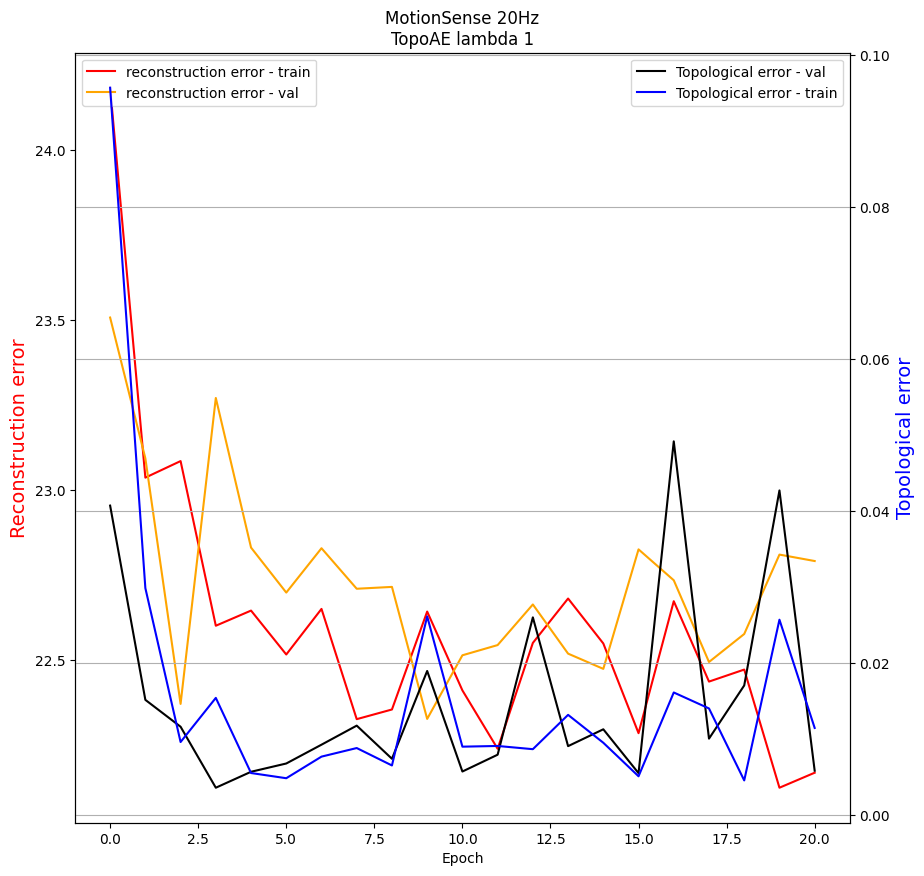

In [10]:
title_plot = "MotionSense 20Hz\nTopoAE lambda " + str(topoae_lambda)
topo_reducer.fit(train_HD, train_Y, title_plot=title_plot)

In [11]:
assert 1==0

AssertionError: 

In [ ]:
train_LD = topo_reducer.transform(train_HD)
test_LD = topo_reducer.transform(test_HD)

In [ ]:
# print(len(train_LD.shape()))

In [ ]:
train_LD = np.reshape(topo_reducer.transform(train_HD), (-1,dimension_to_test))
print('TRAIN LD RESHAPED', train_LD.shape)
test_LD = np.reshape(topo_reducer.transform(test_HD), (-1, dimension_to_test))
print('TEST LD RESHAPED', test_LD.shape)

In [ ]:
# transformer = TransformMultiModalDataset(
#     transforms=[topo_reducer], new_window_name_prefix="scaled."
# )

In [ ]:
experiments_result = run_experiments(train_HD, train_LD, train_Y, test_HD, test_LD, test_Y)
experiments_result